In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/portuguese-bank-marketing-data-set/bank-full.csv


# Reading File 


In [3]:
df=pd.read_csv(r'/kaggle/input/portuguese-bank-marketing-data-set/bank-full.csv')

# EDA 

In [4]:
df.head()#Top 5 rows
df.tail()#Bottom 5 rows
df.describe()
df.isna().sum()
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

****

**Cross Tabulation between target variable (y) and Default**

In [5]:
c1 = df['y'].value_counts()
c1 = pd.crosstab(df['y'],df['default'])
c1

default,no,yes
y,,
no,39159,763
yes,5237,52


*****

**Cross Tabulation between target variable (y) and Housing**

In [6]:
z1=df['y'].value_counts()
z1=pd.crosstab(df['y'],df['housing'])
z1

housing,no,yes
y,,
no,16727,23195
yes,3354,1935


**Cross Tabulation between target variable (y) and Loan**

In [8]:
r1=df['y'].value_counts()
r1=pd.crosstab(df['y'],df['loan'])
r1

loan,no,yes
y,,
no,33162,6760
yes,4805,484


# Column Exploration

In [9]:
category_features = df.select_dtypes(include=['object', 'bool']).columns.values
for col in df.select_dtypes(include=['object', 'bool']):#boolean is true false 
    print(f"{col} ({df[col].nunique()} values):\n{df[col].unique()}")
    
    
    
#shows the  count of all unique values in each column accordingly    
[(print(f"\033[1m\033[94m{col} \n{20 * '-'}\033[0m"), print(df[col].value_counts()), print()) for col in category_features]
print(df.nunique(axis=1))

job (12 values):
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital (3 values):
['married' 'single' 'divorced']
education (4 values):
['tertiary' 'secondary' 'unknown' 'primary']
default (2 values):
['no' 'yes']
housing (2 values):
['yes' 'no']
loan (2 values):
['no' 'yes']
contact (3 values):
['unknown' 'cellular' 'telephone']
month (12 values):
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome (4 values):
['unknown' 'failure' 'other' 'success']
y (2 values):
['no' 'yes']
job 
--------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

marital 
--------------------
married     27214
single      12790
d

**Age Binning**

In [10]:
bin_age = [20,  40,  50,  60, 70,  80, 90]
category_age = ['<20s', '21-40', '41-60', '61-80', '81-90', '>90s']
df['age_binned'] = pd.cut(df['age'], bins=bin_age, labels=category_age)

**Binary Encoding & Mapping**

In [11]:
df['deposit'] = df['y'].map({'yes':1,'no':0})

#using group by to see how many clients have sub and not sub
groupBy_clients = df.groupby("deposit").count()
print(groupBy_clients)

           age    job  marital  education  default  balance  housing   loan  \
deposit                                                                       
0        39922  39922    39922      39922    39922    39922    39922  39922   
1         5289   5289     5289       5289     5289     5289     5289   5289   

         contact    day  month  duration  campaign  pdays  previous  poutcome  \
deposit                                                                         
0          39922  39922  39922     39922     39922  39922     39922     39922   
1           5289   5289   5289      5289      5289   5289      5289      5289   

             y  age_binned  
deposit                     
0        39922       39856  
1         5289        5251  


# Data Visualisation

# Univariate Analysis

****Analysis of Age by Target Variable(deposit)****

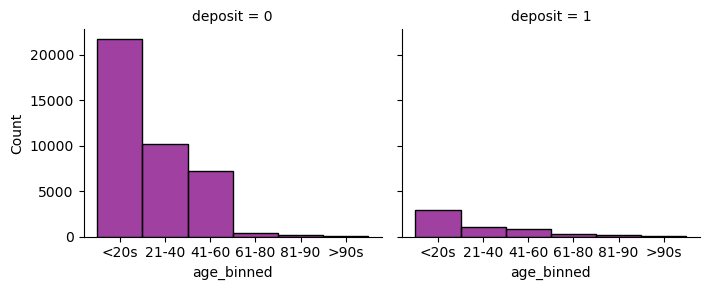

In [12]:
z=sns.FacetGrid(data=df,col='deposit',height=3,aspect=1.2)
z.map(sns.histplot,'age_binned',bins=20,color='purple')
plt.show()

**Counts of Jobs**

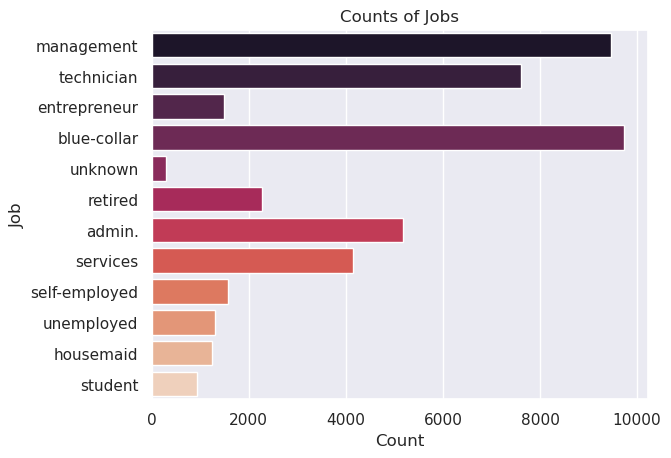

In [13]:
sns.set_theme(style="darkgrid")
sns.countplot(y="job", data=df, palette="rocket", orient='h')
plt.xlabel('Count')
plt.ylabel('Job')
plt.title('Counts of Jobs')
plt.show()

**Prcentage Distribution of Contact Types**

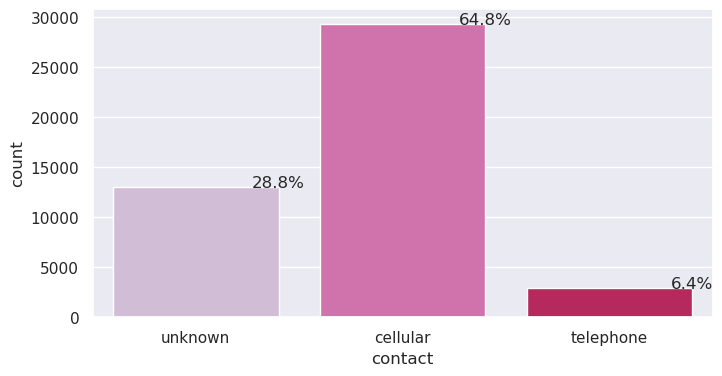

In [14]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='contact',data=df,palette='PuRd')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

**Box plot of Pdays Distribution and Average Count**

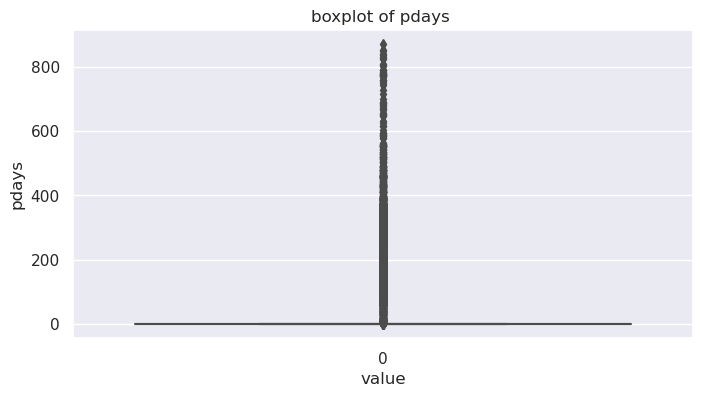

Average count of pdays(mdeian) 40.19782796222158
Averge count of pdays(mean) -1.0


In [15]:
plt.figure(figsize=(8, 4))
sns.boxplot(df['pdays'])

plt.xlabel('value')
plt.ylabel('pdays')
plt.title('boxplot of pdays ')
plt.show()

print('Average count of pdays(mdeian)', df['pdays'].mean())
print('Averge count of pdays(mean)',df['pdays'].median())

**Subscription to Term Deposit Percentage Distribution**

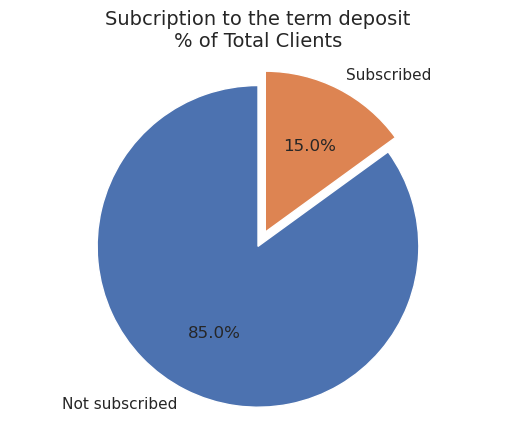

In [16]:
labels = ['Not subscribed', 'Subscribed']
sizes = [85, 15]
explode = (0, 0.1)

plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.title('Subcription to the term deposit\n% of Total Clients', fontsize=14)

plt.show()

# Bivariate Analysis

**Subscription Distribution by Month**

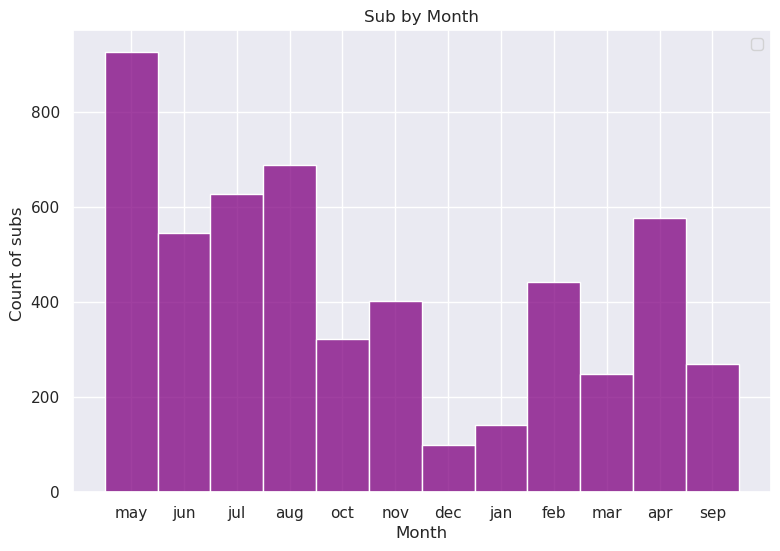

In [17]:
plt.figure(figsize=(9, 6))
sns.set_style('darkgrid')
sns.histplot(df[df["deposit"] == 1]["month"], color="purple")
plt.xlabel("Month")
plt.ylabel("Count of subs ")
plt.title("Sub by Month")
plt.legend()
plt.show()

**Subscription Rate by Job Category**

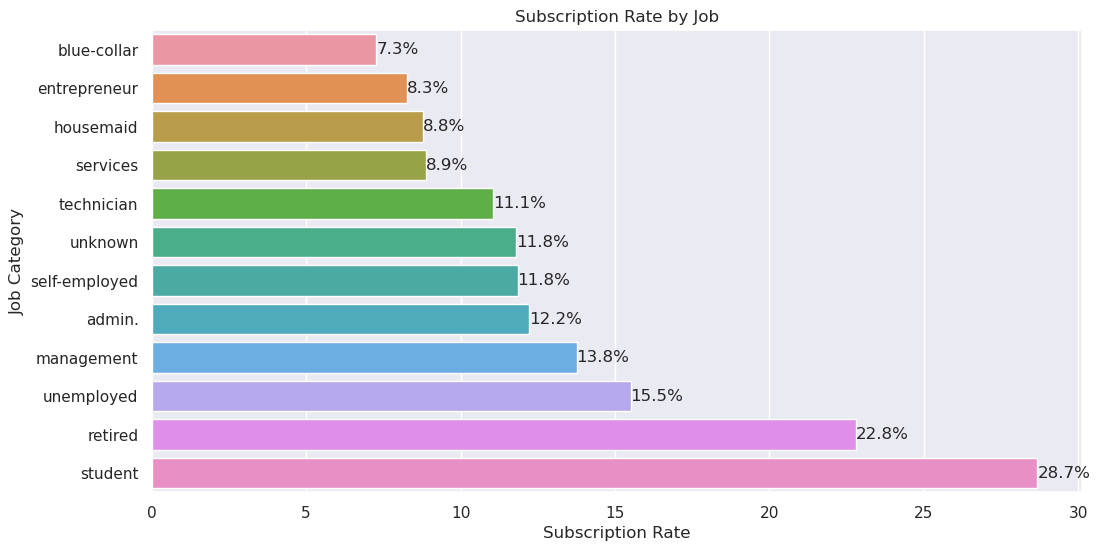

In [18]:
subscription_rate = df.groupby('job')['deposit'].mean() * 100

# Sort the job categories by subscription rate in ascending order
subscription_rate = subscription_rate.sort_values(ascending=True)
plt.figure(figsize=(12, 6))
sns.barplot(x=subscription_rate, y=subscription_rate.index, orient='h')

plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')
# Add percentage labels to the bars
for i, v in enumerate(subscription_rate):
    plt.text(v, i, f'{v:.1f}%', va='center')

plt.show()

**Average Balance By Education Level**

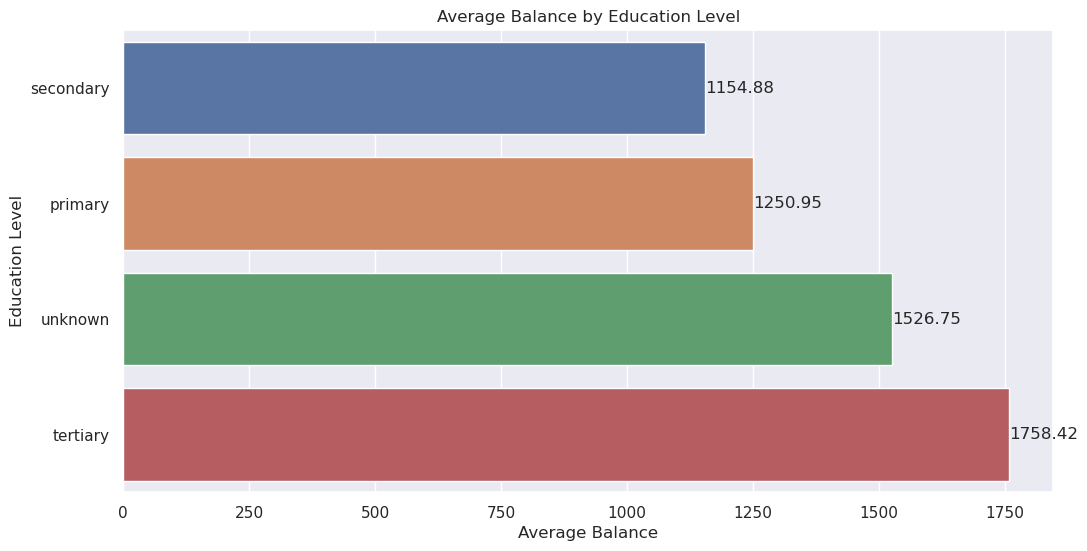

In [21]:
success_rate = df.groupby('education')['balance'].mean()
success_rate = success_rate.sort_values(ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(x=success_rate, y=success_rate.index, orient='h')

plt.title('Average Balance by Education Level')
plt.xlabel('Average Balance')
plt.ylabel('Education Level')

for i, v in enumerate(success_rate):
    plt.text(v, i, f'{v:.2f}', va='center')

plt.show()


**Success Rate by Deposit Category**

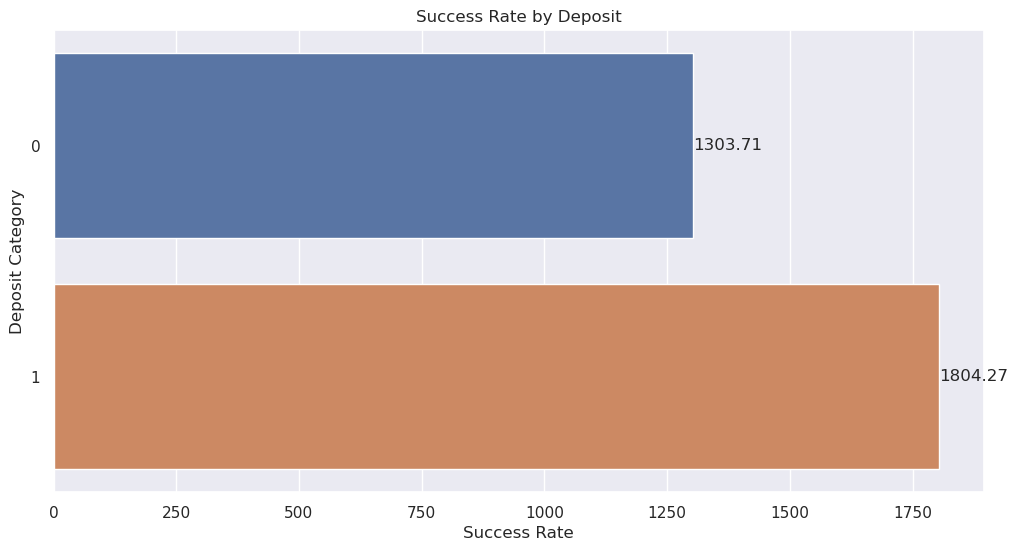

In [23]:
success_rate = df.groupby('deposit')['balance'].mean() 
success_rate = success_rate.sort_values(ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(x=success_rate, y=success_rate.index, orient='horizontal')

plt.title('Success Rate by Deposit')
plt.xlabel('Success Rate')
plt.ylabel('Deposit Category')

# Add percentage labels to the bars
for i, v in enumerate(success_rate):
    plt.text(v, i, f'{v:.2f}', va='center')

plt.show()


**Mean Campaign by Previous Outcome**

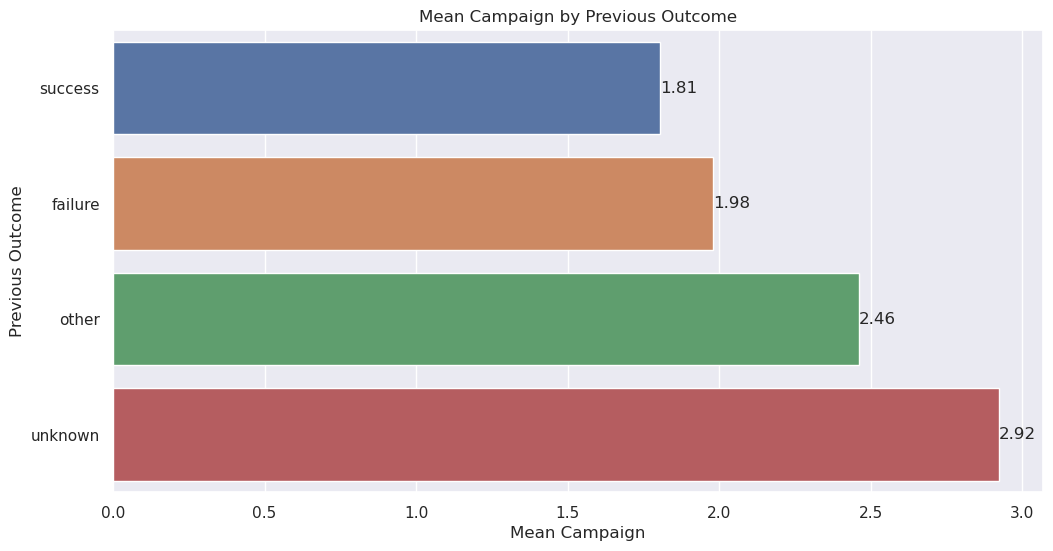

In [24]:
subscription_rate = df.groupby('poutcome')['campaign'].mean()

# Sort the poutcome categories by campaign mean in ascending order
subscription_rate = subscription_rate.sort_values(ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(x=subscription_rate, y=subscription_rate.index, orient='horizontal')

plt.title('Mean Campaign by Previous Outcome')
plt.xlabel('Mean Campaign')
plt.ylabel('Previous Outcome')

# Add mean campaign labels to the bars
for i, v in enumerate(subscription_rate):
    plt.text(v, i, f'{v:.2f}', va='center')

plt.show()


**Count of Deposits by Day**

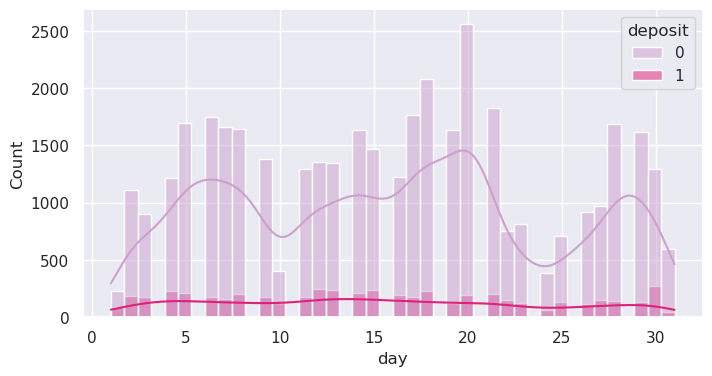

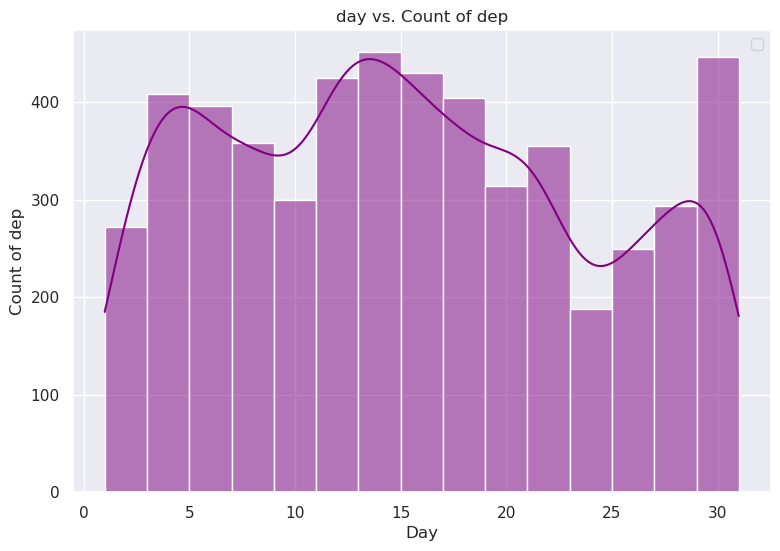

In [25]:
plt.figure(figsize=(8,4))
ax=sns.histplot(x='day',hue = 'deposit',kde=True,data=df,palette='PuRd')

#Assigning 1 to see only subs rate
plt.figure(figsize=(9, 6))
sns.set_style('darkgrid')
sns.histplot(df[df["deposit"] == 1]["day"], bins=15, alpha=0.5,kde=True,color="purple")
plt.xlabel("Day")
plt.ylabel("Count of dep")
plt.title("day vs. Count of dep")
plt.legend()
plt.show()

**Counts of Deposits by Day**

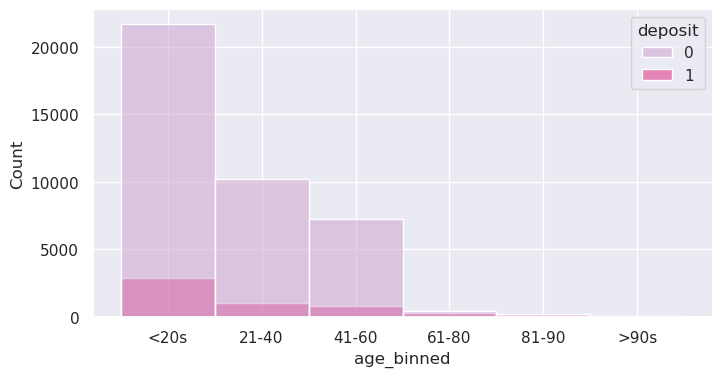

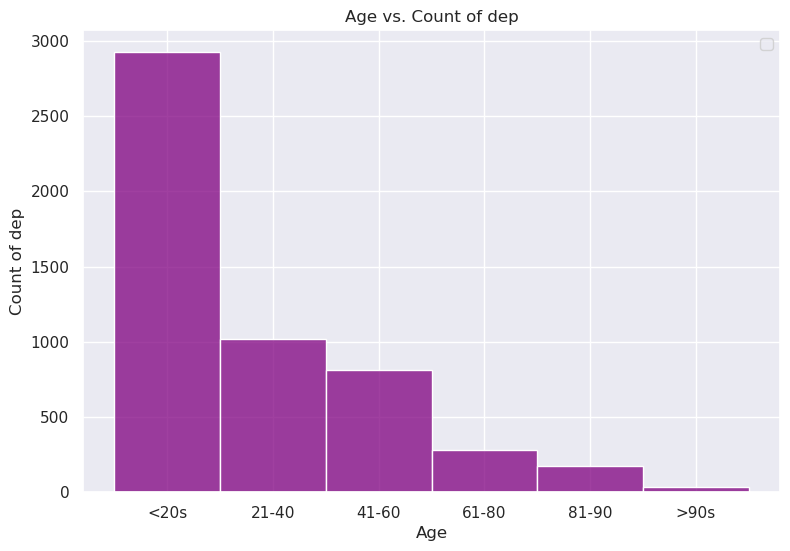

In [26]:
plt.figure(figsize=(8,4))
ax=sns.histplot(x='age_binned',hue = 'deposit',data=df,palette='PuRd')
#Assigning 1 to yes  in deposit 
plt.figure(figsize=(9, 6))
sns.set_style('darkgrid')
sns.histplot(df[df["deposit"] == 1]["age_binned"], color="purple")
plt.xlabel("Age")
plt.ylabel("Count of dep")
plt.title("Age vs. Count of dep")
plt.legend()
plt.show()

**Count of Age Distribution By Previous Outcome**

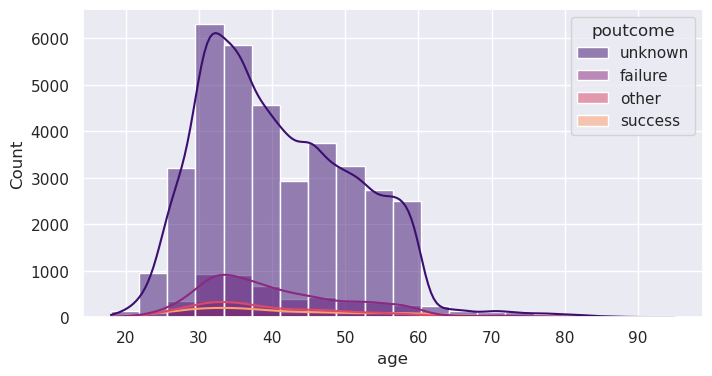

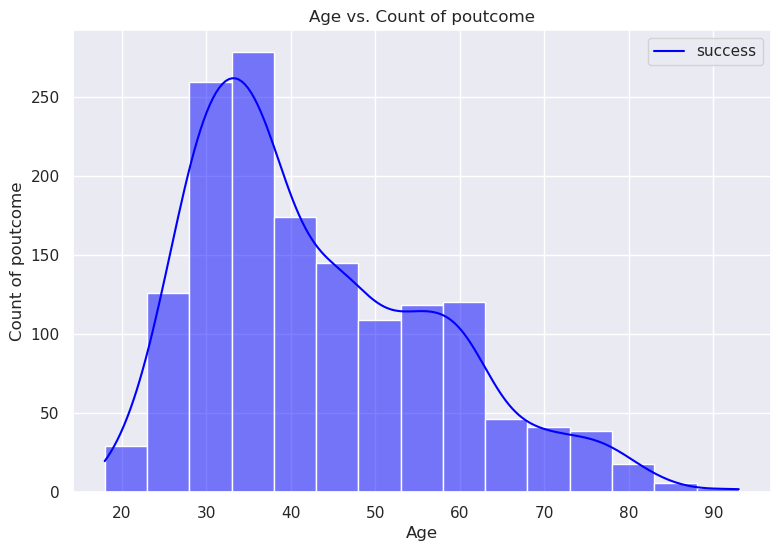

In [28]:
plt.figure(figsize=(8,4))
ax=sns.histplot(x='age',bins=20,hue = 'poutcome',kde=True,data=df,palette='magma')
#here we can see only unknown is taking majority space and success is very less hence not showing up


#Plotting Histogram to see the success rate
plt.figure(figsize=(9, 6))
sns.set_style('darkgrid')
sns.histplot(df[df["poutcome"] == "success"]["age"], bins=15, color="blue",kde=True)
plt.xlabel("Age")
plt.ylabel("Count of poutcome")
plt.title("Age vs. Count of poutcome")
plt.legend(['success'])
plt.show()

**Count of Successful Outcomes of Day**

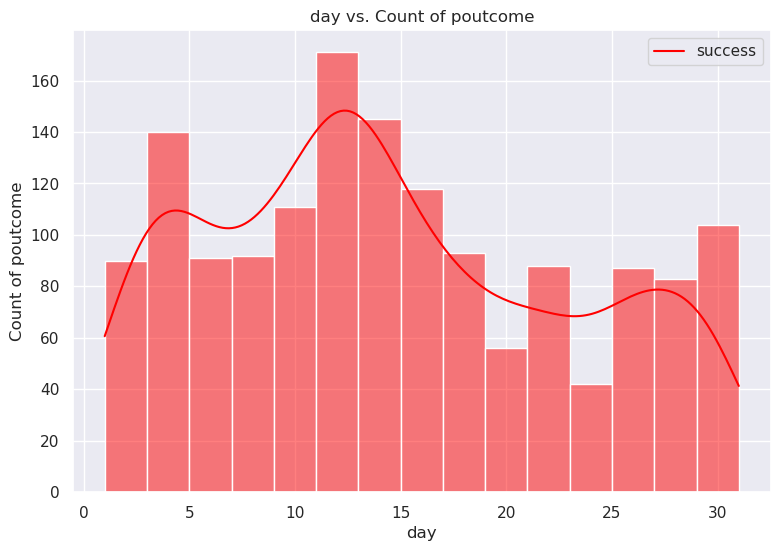

In [29]:
plt.figure(figsize=(9, 6))
sns.set_style('darkgrid')
sns.histplot(df[df["poutcome"] == "success"]["day"], bins=15, alpha=0.5,kde=True,color="red")
plt.xlabel("day")
plt.ylabel("Count of poutcome")
plt.title("day vs. Count of poutcome")
plt.legend(['success'])
plt.show()


# Modelling

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop(["deposit"], axis=1)
y = df["deposit"]
seed=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =seed,stratify=(y))

# Feature Engineering 🔧

In [32]:
#👉 The FE method that used is one-hot encoding, which is transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction.
# one hot encoding converts categorical variables into binary representation. It assign a value 1 if the category is present else it assigns 0.
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_train.head()

X_test.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,poutcome_success,poutcome_unknown,y_no,y_yes,age_binned_<20s,age_binned_21-40,age_binned_41-60,age_binned_61-80,age_binned_81-90,age_binned_>90s
1392,40,640,8,347,2,-1,0,0,1,0,...,0,1,1,0,1,0,0,0,0,0
7518,44,378,30,203,2,-1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
12007,31,356,20,228,5,-1,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
5536,36,655,23,153,4,-1,0,0,1,0,...,0,1,1,0,1,0,0,0,0,0
29816,34,1921,4,61,1,-1,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0


**Feature Scaling**

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**SMOTE Technique**

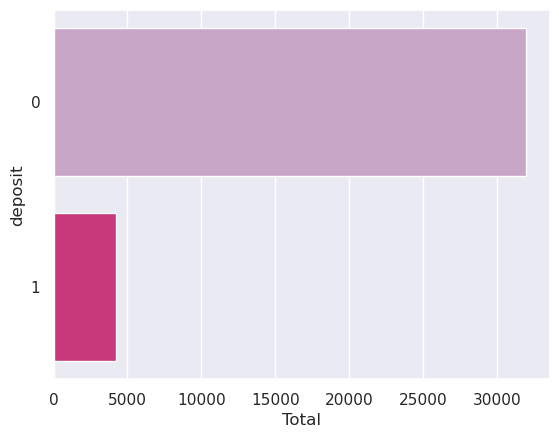

In [34]:
#To Balance Imbalance Data.

#DATA looks highly imbalanced
sns.set_theme(style="darkgrid")
sns.countplot(y= y_train, data=df, palette='PuRd')
plt.ylabel('deposit')
plt.xlabel('Total')
plt.show()

In [35]:
from collections import Counter
from sklearn.datasets import make_classification
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

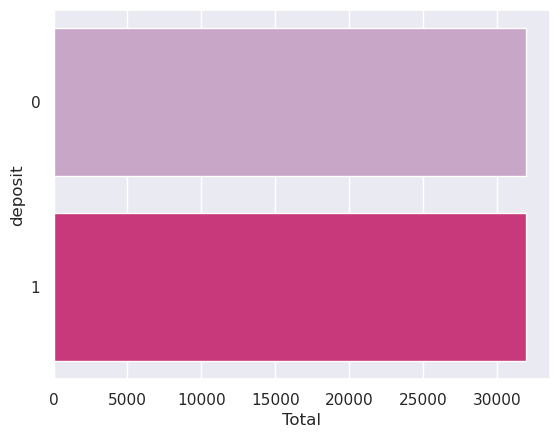

In [36]:
#count representation of deposit
sns.set_theme(style="darkgrid")
sns.countplot(y= y_train, data=df, palette='PuRd')
plt.ylabel('deposit')
plt.xlabel('Total')
plt.show()

# Models

**Logistic Regression**

In [37]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000,random_state=seed)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7985
           1       1.00      1.00      1.00      1058

    accuracy                           1.00      9043
   macro avg       1.00      1.00      1.00      9043
weighted avg       1.00      1.00      1.00      9043

[[7985    0]
 [   0 1058]]
Logistic Regression accuracy is: 100.00%


**Decsion Tree**

In [38]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7985
           1       1.00      1.00      1.00      1058

    accuracy                           1.00      9043
   macro avg       1.00      1.00      1.00      9043
weighted avg       1.00      1.00      1.00      9043

[[7985    0]
 [   0 1058]]
Decision Tree accuracy is: 100.00%


**Random Forest**

In [39]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7985
           1       1.00      1.00      1.00      1058

    accuracy                           1.00      9043
   macro avg       1.00      1.00      1.00      9043
weighted avg       1.00      1.00      1.00      9043

[[7985    0]
 [   0 1058]]
Random Forest accuracy is: 100.00%


# Model Comparison

In [40]:
compare = pd.DataFrame({'Model': ['Logistic Regression',   'Decision Tree',  'Random Forest'], 
                        'Accuracy': [LRAcc*100, DTAcc*100,  RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,100.0
1,Decision Tree,100.0
2,Random Forest,100.0
